<a href="https://colab.research.google.com/github/ryan4739/meu-primeiro-colab/blob/main/meu_primeiro_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oque é o colab?

In [ ]:
print("hello")

# open-source & machine learning

## mediapipe
[introdução a mediapipe](https://colab.research.google.com/github/spmallick/learnopencv/blob/master/Introduction-to-MediaPipe/MediaPipe-sample-solutions.ipynb)

[mediapipe solutions](https://ai.google.dev/edge/mediapipe/solutions/guide)

In [1]:
!pip install opencv-python
!pip install mediapipe
!wget https://raw.githubusercontent.com/spmallick/learnopencv/master/Introduction-to-MediaPipe/hand.jpg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.
--2024-08-13 16:32:33--  https://raw.githubusercontent.com/spmallick/learnopencv/master/Introduction-to-MediaPipe/hand.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

In [2]:
import cv2 as cv
import mediapipe as mp
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


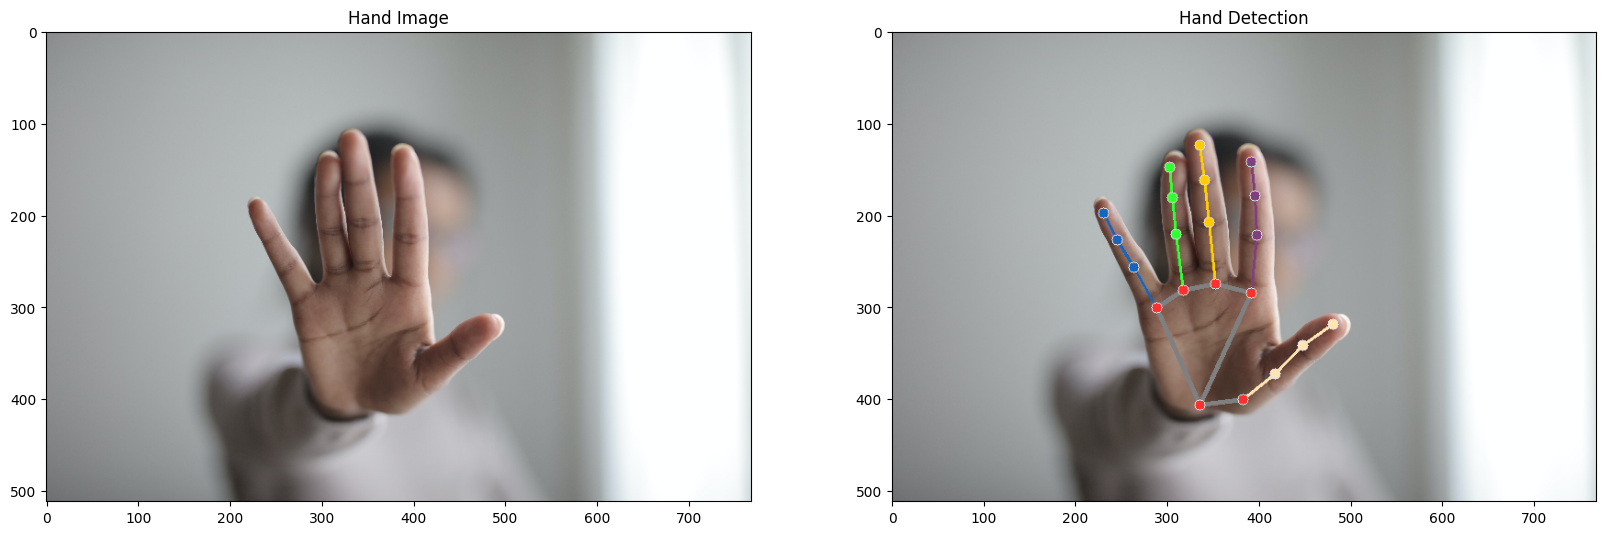

In [3]:
# Initialize MP hands.
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

# Load hand image.
hand_img = cv.imread('hand.jpg')

# Resizing the image for faster processing.
hand_img = cv.resize(hand_img, None, fx=0.1, fy=0.1)

# Convert the BGR image to RGB before processing.
rgb_img = cv.cvtColor(hand_img, cv.COLOR_BGR2RGB)

# Process.
results = hands.process(rgb_img)

# Draw.
annotated_img = hand_img.copy()
for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(annotated_img,
                              hand_landmarks,
                              mp_hands.HAND_CONNECTIONS,
                              mp_drawing_styles.get_default_hand_landmarks_style(),
                              mp_drawing_styles.get_default_hand_connections_style())
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(hand_img[...,::-1])
plt.title('Hand Image')
plt.subplot(122)
plt.imshow(annotated_img[...,::-1])
plt.title('Hand Detection');

## outras implementações famosas

- [gpt-2](https://colab.research.google.com/github/ilopezfr/gpt-2/blob/master/gpt-2-playground_.ipynb)
- [gptNeo](https://colab.research.google.com/github/EleutherAI/GPTNeo/blob/master/GPTNeo_example_notebook.ipynb#scrollTo=lgTG1ammqGB0)
- [jukebox](https://colab.research.google.com/github/openai/jukebox/blob/master/jukebox/Interacting_with_Jukebox.ipynb#scrollTo=uq8uLwZCn0BV)
- [midjourney](https://colab.research.google.com/github/camenduru/stable-diffusion-webui-colab/blob/main/stable/midjourney_v4_diffusion_webui_colab.ipynb)
- [Disco_Diffusion](https://colab.research.google.com/github/alembics/disco-diffusion/blob/main/Disco_Diffusion.ipynb)
- [First Order motion](https://colab.research.google.com/github/sony/nnabla-examples/blob/master/interactive-demos/fomm.ipynb)
- [nerfies](https://colab.research.google.com/github/google/nerfies/blob/main/notebooks/Nerfies_Render_Video.ipynb)

# Machine learning

- [tensorflow](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb)
- [keras](https://keras.io/)

## Banco de dados

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Modelo

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
])

## função de perda


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

## compilar o modelo


In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## treinando o modelo

In [ ]:
model.fit(x_train, y_train, epochs=5)

## resultados

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])


In [ ]:
image_index = 7

In [ ]:
import matplotlib.pyplot as plt
print(probability_model(x_test[image_index:image_index+1]).numpy().argmax())
plt.imshow(x_test[image_index])